In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish = pd.read_csv('Fish.csv')

# The dataset features description:

- Species: Name of the fish species
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm


This data is about characteristic of the fish species by its weight, lenght, height, and width.
In this chance, I want to predict the weight of the fish.

# DATA PRE PROCESSING

In [3]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
fish[fish['Weight']<0]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish = fish.rename(columns={'Length1':'VerticalLength', 'Length2':'DiagonalLength', 'Length3':'CrossLength'})

# EDA and DATA VISUALIZATION

In [8]:
fish_kind = fish.Species.value_counts(normalize=True)
fish_kind

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

<AxesSubplot:>

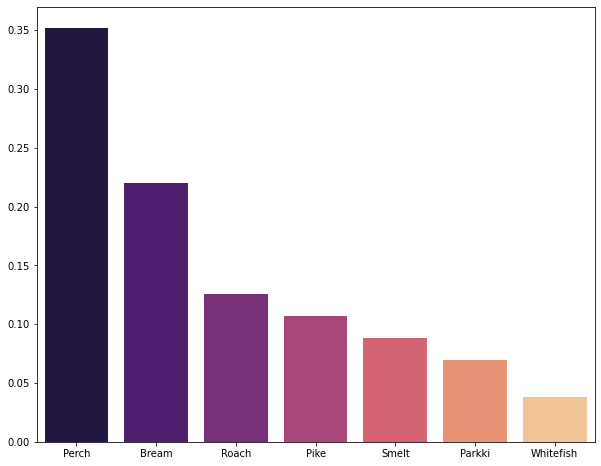

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=fish_kind.keys(), y=fish_kind.values, palette='magma')

The dataset has 35% perch, 22% beam, 12.5% roach, 10.7% pike, 8% smelt, 7% Parkki, and 4% Whitefish

<AxesSubplot:xlabel='Species', ylabel='Weight'>

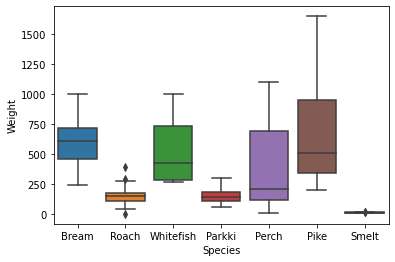

In [10]:
sns.boxplot(x='Species', y='Weight', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Weight'>

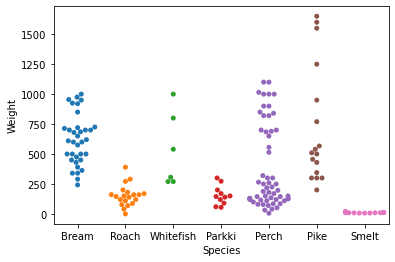

In [11]:
sns.swarmplot(x='Species', y='Weight', data=fish)

In [105]:
fish.groupby(['Species']).median()

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
Species,,,,,,
Bream,610.00,30.40,33.00,38.50,14.9544,5.2801
Parkki,145.00,19.00,20.70,23.20,8.8928,3.2928
Perch,207.50,23.25,25.30,26.75,6.9218,4.1549
Pike,510.00,40.10,43.00,45.80,7.2900,4.8700
Roach,147.50,20.50,22.25,24.85,6.5126,3.6027
Smelt,9.85,11.30,11.80,13.10,2.2002,1.2731
Whitefish,423.00,27.05,29.50,32.40,9.7610,5.6033


- From this plot , we know  most roach, Parkki, and Smelt have weight below 250. Smelt has the smallest weight among the species
- Perch also has weight with median below 250, but from this we know perch species can grow and have weight more than 250.
- Bream have median weight 610, have weight between 250 until 1000
- Whitefish have median weight 423
- Roach have median weight 147.50
- Parrki have median weight 145
- Pike have median weight 510 but also can grow to 1500

<AxesSubplot:xlabel='Species', ylabel='VerticalLength'>

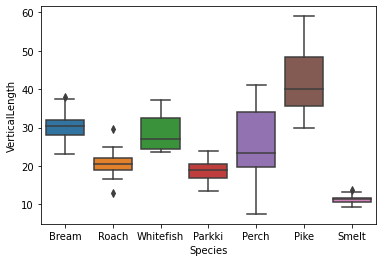

In [12]:
sns.boxplot(x='Species', y='VerticalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='VerticalLength'>

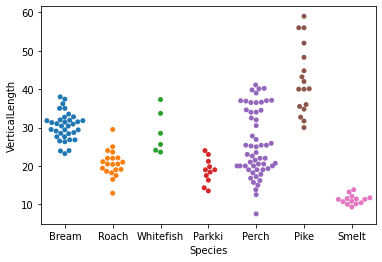

In [13]:
sns.swarmplot(x='Species', y='VerticalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='DiagonalLength'>

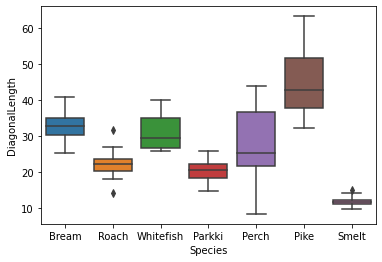

In [14]:
sns.boxplot(x='Species', y='DiagonalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='DiagonalLength'>

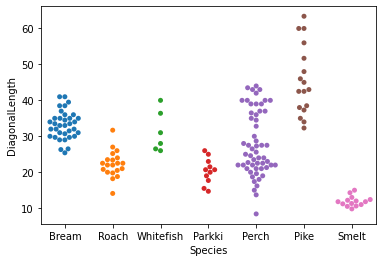

In [15]:
sns.swarmplot(x='Species', y='DiagonalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='CrossLength'>

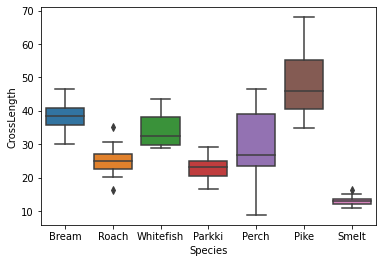

In [16]:
sns.boxplot(x='Species', y='CrossLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='CrossLength'>

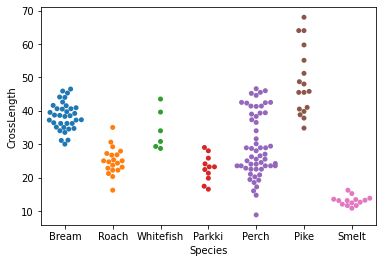

In [17]:
sns.swarmplot(x='Species', y='CrossLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Width'>

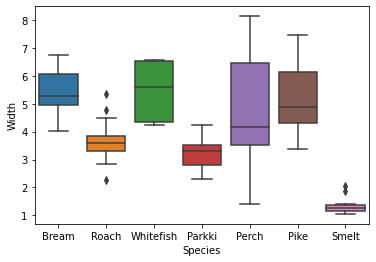

In [18]:
sns.boxplot(x='Species', y='Width', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Width'>

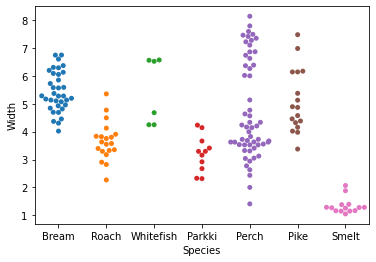

In [19]:
sns.swarmplot(x='Species', y='Width', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Height'>

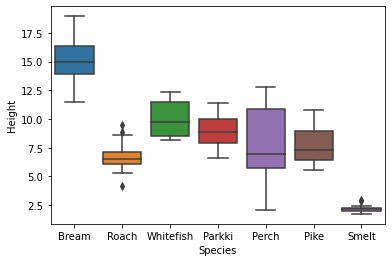

In [20]:
sns.boxplot(x='Species', y='Height', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Height'>

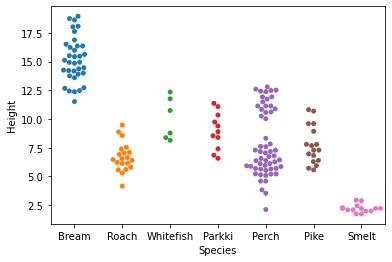

In [106]:
sns.swarmplot(x='Species', y='Height', data=fish)

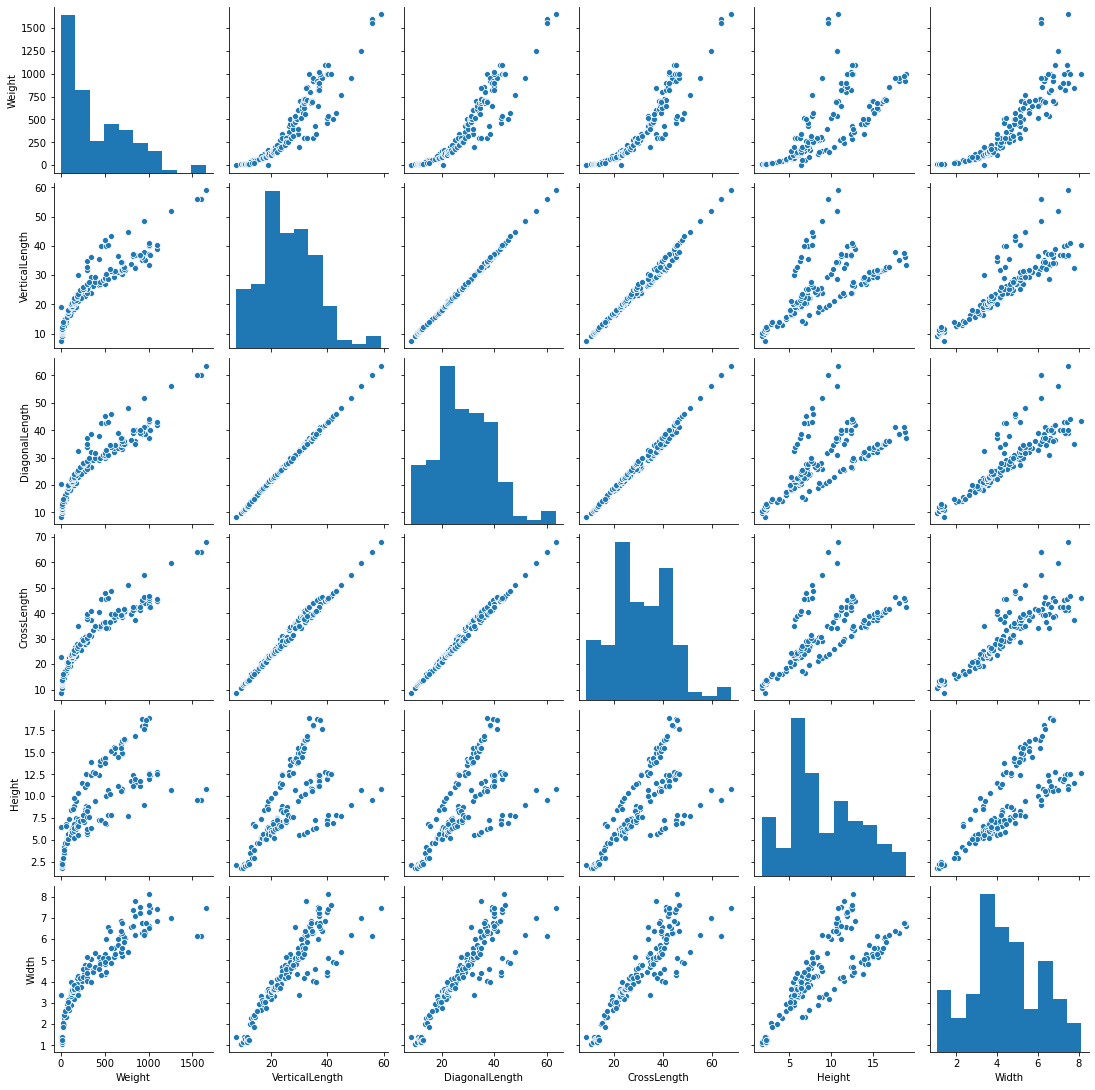

In [22]:
sns.pairplot(fish)

In [23]:
fish

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [24]:
numeric = fish.select_dtypes(exclude='object')
numeric

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

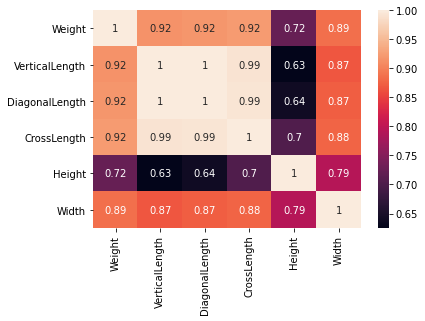

In [25]:
sns.heatmap(numeric.corr(), annot=True)

# FEATURE ENGINEERING

In [26]:
predictors = fish.drop(columns=['Weight','Species'])
target =  fish['Weight']

- Finding VIF score to avoid multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

print(vif)


          feature           VIF
0  VerticalLength  12782.535830
1  DiagonalLength  16598.744318
2     CrossLength   3380.815907
3          Height     76.064364
4           Width     92.658672


In [28]:
predictors = predictors.drop(columns=['VerticalLength'])

In [29]:
vif = pd.DataFrame()
vif['feature'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

print(vif)


          feature          VIF
0  DiagonalLength  3305.983443
1     CrossLength  3380.711180
2          Height    70.504117
3           Width    92.536556


In [30]:
predictors = predictors.drop(columns=['DiagonalLength'])

In [31]:
vif = pd.DataFrame()
vif['feature'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

print(vif)


       feature        VIF
0  CrossLength  33.500624
1       Height  14.572390
2        Width  46.018044


In [33]:
predictors =pd.DataFrame(predictors, columns=['CrossLength','Height','Width'])

In [34]:
predictors

,CrossLength,Height,Width
0,30.0,11.5200,4.0200
1,31.2,12.4800,4.3056
2,31.1,12.3778,4.6961
3,33.5,12.7300,4.4555
4,34.0,12.4440,5.1340
...,...,...,...
154,13.4,2.0904,1.3936
155,13.5,2.4300,1.2690
156,13.8,2.2770,1.2558
157,15.2,2.8728,2.0672


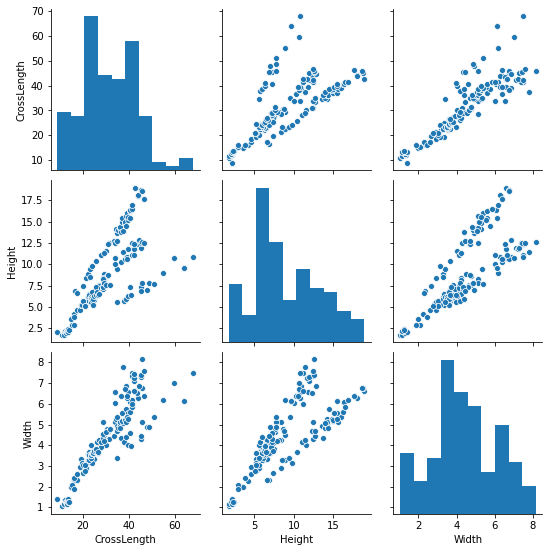

In [35]:
sns.pairplot(predictors)

# MODELLING WITH LINEAR REGRESSION

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
Rsquare = r2_score(y_test, y_pred)
metrics = [MSE,RMSE,Rsquare]

metrics_evaluation = pd.DataFrame({'Metrics': ['MSE', 'RMSE', 'Rsquare'], 'Metrics Score': metrics })

In [84]:
metrics_evaluation

,Metrics,Metrics Score
0,MSE,24559.572319
1,RMSE,156.714940
2,Rsquare,0.851503
